The candidate shall develop a technology for a specific spam detection, based on the provenance and content of the email. An email shall be treated as spam when it comes from a mail domain (smtp sender) that is classified as spamming, or it contains a set of terms that are referrable to spam. The training phase shall deliver a model of spam that is compatible with the above specifications. 

The training set of the process can be found on https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv and can be implemented either:

- by using a naive Bayes classifier; 

- or by using a FFNN;

- or by using an MLP with two layers.

The technology is to be implemented by using either NLTK with Python or OpenNLP with Java. The solution shall be valued based on the correctness, completeness and consistency of the solution implemented. For the evaluation, we shall consider confusion matrix, with specific emphasis on the F1 measure.

Overall, students shall deliver the solution via GitHub. On accessing the solution we value it by anti-cheating technologies, and therefore it will not be considered acceptable when more than 60% of the code is not original. Along with the solution, please upload also the confusion matrix and some analysis on the effectiveness. No value shall be given to solution strength. If a solution is not at the state-of-the-art, we consider it fine in any case, provided it comes along with the above characteristics.

### Imports

In [23]:
# impleamnets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [24]:
# load data

data = pd.read_csv("emails.csv")
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# print all the columns
print(data.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [ ]:
data["spam"].head()

0    0
1    0
2    0
3    0
4    0
Name: spam, dtype: int64

In [32]:
# lets take just the spam that have value 1 

spam_emails = data[data["Prediction"] == 1]
spam_emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
16,Email 17,3,1,2,2,0,1,17,0,0,...,0,0,0,0,0,0,0,1,0,1
17,Email 18,36,21,6,14,7,17,194,25,5,...,0,0,0,0,0,0,0,3,0,1
25,Email 26,12,53,2,14,18,14,287,0,2,...,0,0,0,0,0,0,0,6,0,1


In [33]:
non_spam_emails = data[data["Prediction"] == 0]
non_spam_emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [39]:
# lets make spam and non spam to be arrays
spam = np.array(spam_emails)
non_spam = np.array(non_spam_emails)

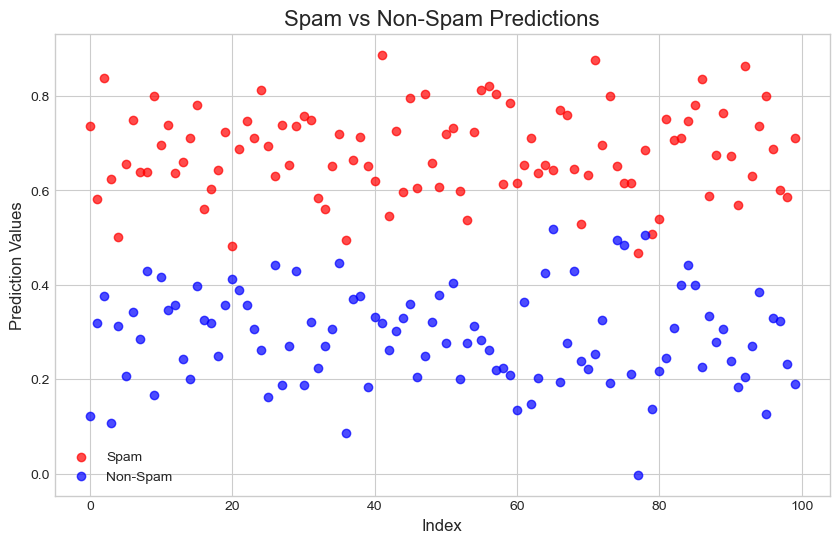

In [47]:
# Set the style of the plot
plt.style.use("seaborn-v0_8-whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot spam and non-spam data
ax.scatter(range(len(spam)), spam, color="red", label="Spam", alpha=0.7)
ax.scatter(range(len(non_spam)), non_spam, color="blue", label="Non-Spam", alpha=0.7)

# Add labels, title, and legend
ax.set_title("Spam vs Non-Spam Predictions", fontsize=16)
ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("Prediction Values", fontsize=12)
ax.legend()

# Show the plot
plt.show()


### lets apply the by using a naive Bayes classifier; 

In [ ]:
# by using a naive Bayes classifier; 

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features and target
X = data.drop("Prediction", axis=1)
y = data["Prediction"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions

y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")



Model accuracy: 94.78%


In [51]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[697,  42],
       [ 12, 284]])

In [52]:
# Create a DataFrame of the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
conf_matrix_df

,Predicted 0,Predicted 1
Actual 0,697,42
Actual 1,12,284


In [ ]:
# r by using a FFNN;

from sklearn.neural_network import MLPClassifier

# Create the Multi-Layer Perceptron classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 97.49%


In [54]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[729,  10],
       [  9, 287]])

In [55]:
# Create a DataFrame of the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
conf_matrix_df

,Predicted 0,Predicted 1
Actual 0,729,10
Actual 1,9,287


In [ ]:
# - or by using an MLP with two layers.

# Create the Multi-Layer Perceptron classifier
